# Tokenizador BERT
Vamos a ver cómo funciona el tokenizado WordPiece que utiliza el modelo BERT. Usamos la librería `transformers`. Se puede instalar en Anaconda con  
```
conda install -c huggingface transformers
```


In [2]:
#instalamos la librería (Google Colab)
!pip install transformers

     ---------------------------------------- 7.1/7.1 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 236.8/236.8 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 6.5 MB/s eta 0:00:00
     -------------------------------------- 160.1/160.1 kB 4.8 MB/s eta 0:00:00


In [3]:
from transformers import AutoTokenizer

C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


Exploramos el vocabulario del modelo `bert-base-cased`(inglés)

In [4]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer.vocab_size # cuantas palabras tiene el vocabulario/ conoce el modelo

C:\Users\franz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\franz\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


28996

In [5]:
import numpy as np

np.random.choice(list(tokenizer.vocab.keys()), 10)

# unas palabras que llevan '##' para indicar que son trozos de palabras

array(['Wolfgang', 'Member', '##tles', '##н', 'bowed', 'Idaho',
       'quantitative', 'dancer', '239', 'Dora'], dtype='<U18')

El modelo BERT utiliza un tokenizado subword de tipo *WordPiece*:


In [6]:
output = tokenizer.tokenize("the BERT tokenizer was created with a WordPiece model")
print(output)

# las palabras que no conoce el modelo las divide en trozos que conoce

['the', 'B', '##ER', '##T', 'token', '##izer', 'was', 'created', 'with', 'a', 'Word', '##P', '##ie', '##ce', 'model']


In [7]:
len(output) # no nos da el número de palabras, sino el número de trozos

15

In [10]:
# Para contar las palabras: hacer split por espacios
len("the BERT tokenizer was created with a WordPiece model".split(' '))

9

Para utilizar un documento tokenizado en BERT tenemos que convertirlo en tokens con el método `tokenizer`

In [11]:
output = tokenizer("the BERT tokenizer was created with a WordPiece model") # la clase tokenizer asigna IDs a las palabras automáticamente


In [12]:
output

{'input_ids': [101, 1103, 139, 9637, 1942, 22559, 17260, 1108, 1687, 1114, 170, 10683, 2101, 1663, 2093, 2235, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [13]:
output.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [14]:
len(output.input_ids) # corresponde a los trozos de palabras y 2 más que son los tokens especiales de inicio y fin de frase (CLS y SEP)

17

El tokenizador asigna cada token a su `token_id` correspondiente en el vocabulario

In [15]:
import pandas as pd

tokens = map(lambda t: {'token_id': t,
                        'token': tokenizer.convert_ids_to_tokens(t)},
             output.input_ids)

pd.DataFrame(tokens)

,token_id,token
0,101,[CLS]
1,1103,the
2,139,B
3,9637,##ER
4,1942,##T
5,22559,token
6,17260,##izer
7,1108,was
8,1687,created
9,1114,with


El modelo BERT añade unos tokens especiales al inicio y al final de cada documento:

In [16]:
#tokens especiales
tokenizer.convert_ids_to_tokens([0, 100, 101, 102, 103])

# PAD para rellenar las frases que son más cortas que la más larga
# UNK para palabras que no conoce el modelo
# CLS para inicio de frase
# SEP para final de frase
# MASK para enmascarar palabras

['[PAD]', '[UNK]', '[CLS]', '[SEP]', '[MASK]']

Tokenizado de pares de frases (para aplicaciones con dos documentos de entrada, como NLI o QA)

In [17]:
# 2 frases como 1 entrada
output = tokenizer([["this is the first sentence",
    "this is the second one"]])
output

{'input_ids': [[101, 1142, 1110, 1103, 1148, 5650, 102, 1142, 1110, 1103, 1248, 1141, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [18]:
print(tokenizer.decode(output['input_ids'][0]))

[CLS] this is the first sentence [SEP] this is the second one [SEP]


In [19]:
# VS: 2 entradas de 1 frase cada una 
output = tokenizer(["this is the first sentence",
    "this is the second one"])
output

{'input_ids': [[101, 1142, 1110, 1103, 1148, 5650, 102], [101, 1142, 1110, 1103, 1248, 1141, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1]]}

In [24]:
print(tokenizer.decode(output['input_ids'][0]) + ' | ' + tokenizer.decode(output['input_ids'][1]))

[CLS] this is the first sentence [SEP] | [CLS] this is the second one [SEP]


### Tokenizado de un corpus de documentos
Cuando se tokeniza más de un documento, es necesario ajustar la longitud de todos al mismo número de tokens (con *padding/truncating*)

In [25]:
text = [
    "This movie was great!",
    "I hated this move, waste of time!",
    "Epic?"
]

encoded = tokenizer(text, padding=True, add_special_tokens=True)

print("**Input IDs**")
for a in encoded.input_ids:
    print(a)

print("**Attention Mask**")
for a in encoded.attention_mask:
    print(a)

**Input IDs**
[101, 1188, 2523, 1108, 1632, 106, 102, 0, 0, 0, 0]
[101, 146, 5687, 1142, 1815, 117, 5671, 1104, 1159, 106, 102]
[101, 17375, 136, 102, 0, 0, 0, 0, 0, 0, 0]
**Attention Mask**
[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]


## Análisis del vocabulario
El vocabulario contiene palabras completas y partes de palabra (tokens que comienzan por '##')

In [26]:
one_chars = []
one_chars_hashes = []

# recorremos todos los tokens del vocabulario
for token in tokenizer.vocab.keys():
    
    # guardamos los tokens de un solo caracter
    if len(token) == 1:
        one_chars.append(token)
    
    # guardamos los tokens de un solo caracter precedidos de ##    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)

In [27]:
print(one_chars)

['ɕ', '「', 'Ε', 'आ', 'ό', 's', 'ṃ', '⁰', 'ʰ', 'ᵘ', '心', ':', 'ắ', '郡', 'ф', '´', 'ج', 'و', 'y', 'ị', 'ナ', '藤', 'ṇ', 'Ś', 'ו', '（', '國', 'э', '文', 'ể', 'ン', '“', '太', 'ъ', '⊆', 'え', '³', 'Δ', '：', '」', 'Ż', 'ј', '石', '!', 'ř', '♭', 'ा', 'Г', 'f', 'ָ', '⟩', '佐', 'г', '₎', 'Ι', 'ব', 'կ', 'ų', 'О', 'ু', '∗', 'З', 'ல', 'أ', 'ط', 'Φ', 'ら', '生', 'L', 'Е', '皇', 'ئ', '¢', 'ὐ', '‖', '野', '河', 'ậ', 'ो', '⁷', 'ہ', 'つ', 'ń', 'ʒ', 'Ο', 'ₐ', 'ı', '₅', '本', 'Ə', 'گ', '<', '«', 'Ț', 'Τ', 'ɣ', 'ு', 'ス', 'ʑ', 'ớ', 'ï', 'Å', 'ན', 'ח', 'ţ', 'て', 'ᵀ', '宀', '்', 'ィ', 'ح', 'r', 'Ḥ', '–', 'ῖ', 'آ', 'グ', 'К', 'я', '子', '¡', 'נ', 'さ', '川', '海', 'ּ', 'ǫ', '~', 'ä', 'ū', '©', 'ɛ', 'ᵣ', 'न', 'ʿ', '₃', 'z', 'শ', 'ி', 'ロ', '三', '陽', 'き', 'ム', 'ع', 'ủ', '龸', '土', 'ས', 'च', 'ß', 'Β', '≈', 'ḩ', 'x', 'द', 'ص', 'ひ', '・', 'ן', 'Y', 'ই', '₀', '夫', 'š', 'エ', 'ذ', 'ǒ', '版', 'đ', 'ᵈ', 'प', '₊', '☆', '門', '∘', '宮', 'ď', 'τ', '®', 'Η', 'α', 'к', '0', 'Ц', 'פ', '⁴', '∧', 'Þ', '№', '木', 'ì', 'υ', '1', 'რ', 'ს', 'জ', 'C', '星', '侍',

In [28]:
print(one_chars_hashes)

['##হ', '##ᵣ', '##“', '##☉', '##κ', '##ं', '##ľ', '##»', '##三', '##ג', '##ʑ', '##ছ', '##Λ', '##ɔ', '##井', '##は', '##ि', '##州', '##ᵀ', '##্', '##青', '##ז', '##।', '##ς', '##花', '##ₛ', '##т', '##ä', '##с', '##ོ', '##⁺', '##¨', '##ɲ', '##ガ', '##.', '##に', '##À', '##न', '##‑', '##ṣ', '##亻', '##а', '##⁻', '##ט', '##Ա', '##ָ', '##Ч', '##ص', '##コ', '##う', '##ⁱ', '##³', '##ᵇ', '##明', '##+', '##থ', '##Æ', '##ɨ', '##ż', '##ס', '##ض', '##ő', '##島', '##ل', '##月', '##ذ', '##°', '##Θ', '##ე', '##_', '##ď', '##ч', '##力', '##स', '##ʂ', '##李', '##と', '##ে', '##書', '##И', '##й', '##A', '##犬', '##⁶', '##س', '##w', '##-', '##お', '##¢', '##े', '##τ', '##ƒ', '##ུ', '##ս', '##ℓ', '##ʀ', '##谷', '##₂', '##আ', '##₉', '##b', '##エ', '##キ', '##ֶ', '##♣', '##心', '##ι', '##♦', '##ậ', '##è', '##―', '##வ', '##龸', '##武', '##な', '##ℝ', '##け', '##æ', '##ï', '##ེ', '##ḩ', '##C', '##j', '##<', '##ⁿ', '##宿', '##ủ', '##か', '##г', '##ğ', '##ŋ', '##υ', '##È', '##̍', '##フ', '##⟨', '##ᵉ', '##ž', '##ấ', '##子', '##ū', '##क', '##ō'

Longitud de token máxima: 18


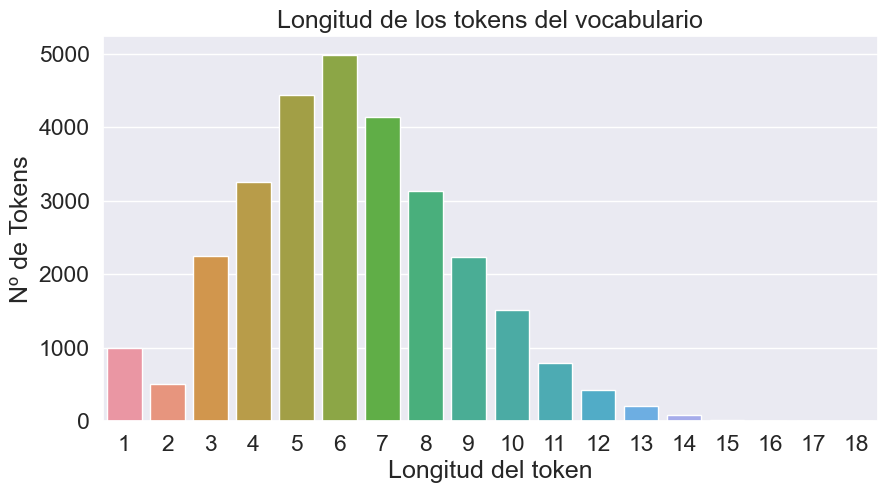

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Plot the number of tokens of each length.
sns.countplot(x=token_lengths)
plt.title('Longitud de los tokens del vocabulario')
plt.xlabel('Longitud del token')
plt.ylabel('Nº de Tokens')

print('Longitud de token máxima:', max(token_lengths))

Ahora analizamos sólo las subpalabras (tokens que empiezan por `'##'` y no son caracteres únicos)

Número de subwords: 6477


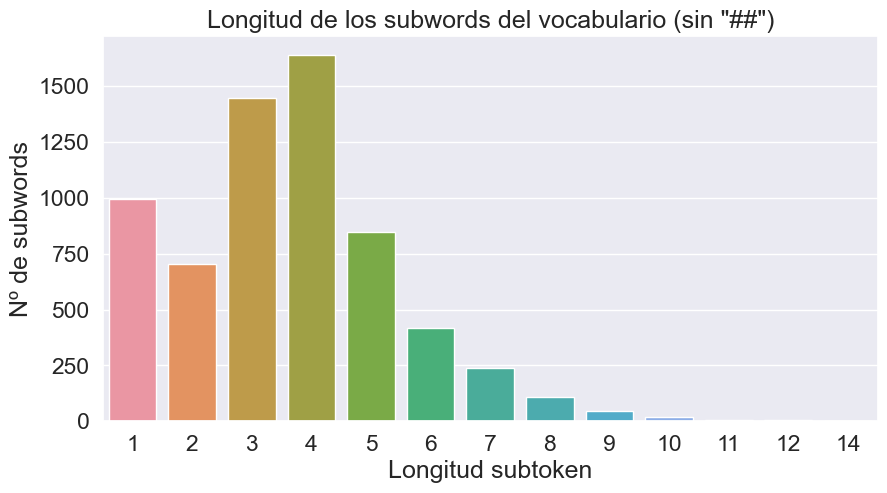

In [30]:
num_subwords = 0

subword_lengths = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        
        # Tally all subwords
        num_subwords += 1

        # Measure the sub word length (without the hashes)
        length = len(token) - 2

        # Record the lengths.        
        subword_lengths.append(length)

sns.countplot(x=subword_lengths)
plt.title('Longitud de los subwords del vocabulario (sin "##")')
plt.xlabel('Longitud subtoken')
plt.ylabel('Nº de subwords')

print(f"Número de subwords: {len(subword_lengths)}")


## Tokenizado en otros idiomas
El modelo BERT en inglés no conoce las palabras del vocabulario español
### Ejercicio
Convierte en tokens la frase '*El modelo BERT en inglés no conoce el vocabulario español*' con el modelo BERT previamente cargado y con el modelo multilingüe `nlptown/bert-base-multilingual-uncased-sentiment`. Compara las diferencias.

In [ ]:
#Modelo BERT inglés


En cambio el mismo texto tokenizado con un modelo BERT multilingüe sí conoce las palabras:

In [ ]:
#Modelo BERT multilingüe